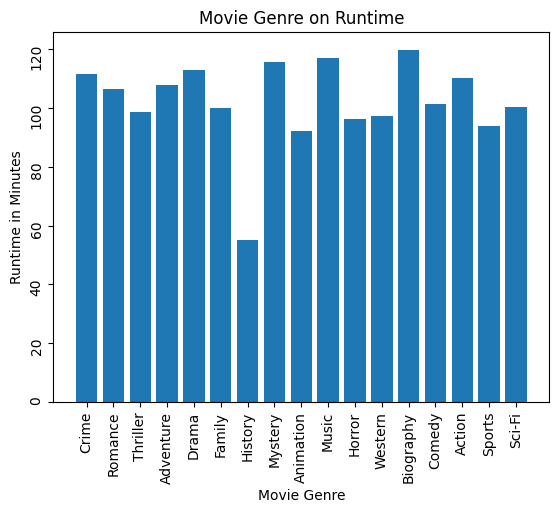

+-----------------+
|     avg(runtime)|
+-----------------+
|107.2616127348643|
+-----------------+



In [49]:
# MovieGeneraOnRuntime.py
# Mason Sipe
#
# The purpose of this file is to show the relation between the genera of a movie and if it has any effect on the length
# of the runtime
# 
# This can be accomplished by calculating the average of the specified runtime of each movie genera that is present within 
# the dataset and displaying it on a graph to get a visual interpretation of the data that is being provided


# need to import to use pyspark
from pyspark.sql import Row
 
# need to import for session creation
from pyspark.sql import SparkSession
  
    
#import mean function 
from pyspark.sql.functions import mean


# creating the session
spark = SparkSession.builder.appName("MovieGeneraOnRuntime").getOrCreate()


# useful functions
from pyspark.sql.functions import avg
from pyspark.sql.functions import col

# read data from a specific file
df = spark.read.option("Header",True).option("InferSchema",True).csv("./Raw Data/movies.csv")

# df.printSchema()
# output of the last command:
# root
#  |-- name: string (nullable = true)
#  |-- rating: string (nullable = true)
#  |-- genre: string (nullable = true)
#  |-- year: integer (nullable = true)
#  |-- released: string (nullable = true)
#  |-- score: double (nullable = true)
#  |-- votes: double (nullable = true)
#  |-- director: string (nullable = true)
#  |-- writer: string (nullable = true)
#  |-- star: string (nullable = true)
#  |-- country: string (nullable = true)
#  |-- budget: double (nullable = true)
#  |-- gross: double (nullable = true)
#  |-- company: string (nullable = true)
#  |-- runtime: double (nullable = true)

# since the file has been successfully loaded, we want to get the different, unique generas throughout the file

#dfselected = df.select("released").show(truncate=False);

# This returns the raw rows exclusively for how they were released upon the specified dataset. 
# with this data we need to find the data about the budget that we have within the specific data

DFQ1 = df.select("genre","runtime")

# we have a way to get our key and value for what we want overall. However, we need to know the different kinds of data
# within the datasets and how many genras there are. To do this we can use the distinct pyspark function to find this.

#df.select("genre").distinct().show()


# output


#+---------+
#|    genre|
#+---------+
#|    Crime|
#|  Romance|
#| Thriller|
#|Adventure|
#|    Drama|
#|   Family|
#|  Fantasy|
#|  History|
#|  Mystery|
#|  Musical|
#|Animation|
#|    Music|
#|   Horror|
#|  Western|
#|Biography|
#|   Comedy|
#|   Action|
#|    Sport|
#|   Sci-Fi|
#+---------+

# from the data shown above, we can now select the average for each individual genre that is within our dataset.


DBQ_Crime = DFQ1.filter(DFQ1.genre == "Crime").select(mean("runtime"))
DBQ_Romance = DFQ1.filter(DFQ1.genre == "Romance").select(mean("runtime"))
DBQ_Thriller = DFQ1.filter(DFQ1.genre == "Thriller").select(mean("runtime"))
DBQ_Adventure = DFQ1.filter(DFQ1.genre == "Adventure").select(mean("runtime"))
DBQ_Drama = DFQ1.filter(DFQ1.genre == "Drama").select(mean("runtime"))
DBQ_Family = DFQ1.filter(DFQ1.genre == "Family").select(mean("runtime"))
DBQ_Fantasy = DFQ1.filter(DFQ1.genre == "Fantasy").select(mean("runtime"))
DBQ_History = DFQ1.filter(DFQ1.genre == "History").select(mean("runtime"))
DBQ_Mystery = DFQ1.filter(DFQ1.genre == "Mystery").select(mean("runtime"))
DBQ_Animation = DFQ1.filter(DFQ1.genre == "Animation").select(mean("runtime"))
DBQ_Music = DFQ1.filter(DFQ1.genre == "Music").select(mean("runtime"))
DBQ_Horror = DFQ1.filter(DFQ1.genre == "Horror").select(mean("runtime"))
DBQ_Western = DFQ1.filter(DFQ1.genre == "Western").select(mean("runtime"))
DBQ_Biography = DFQ1.filter(DFQ1.genre == "Biography").select(mean("runtime"))
DBQ_Comedy = DFQ1.filter(DFQ1.genre == "Comedy").select(mean("runtime"))
DBQ_Action = DFQ1.filter(DFQ1.genre == "Action").select(mean("runtime"))
DBQ_Sport = DFQ1.filter(DFQ1.genre == "Sport").select(mean("runtime"))
DBQ_Scifi = DFQ1.filter(DFQ1.genre == "Sci-Fi").select(mean("runtime"))

# Since we have our data and we have found the average of it, we are now able to put the data into a dictionary to make it 
# easier to be able to visualise the data that has been found.

output = {
    "Crime" : DBQ_Crime.head()[0],
    "Romance" : DBQ_Romance.head()[0],
    "Thriller" : DBQ_Thriller.head()[0],
    "Adventure" : DBQ_Adventure.head()[0],
    "Drama" : DBQ_Drama.head()[0],
    "Family" : DBQ_Family.head()[0],
    "History" : DBQ_History.head()[0],
    "Mystery" : DBQ_Mystery.head()[0],
    "Animation" : DBQ_Animation.head()[0],
    "Music" : DBQ_Music.head()[0],
    "Horror" : DBQ_Horror.head()[0],
    "Western" : DBQ_Western.head()[0],
    "Biography" : DBQ_Biography.head()[0],
    "Comedy" : DBQ_Comedy.head()[0],
    "Action" : DBQ_Action.head()[0],
    "Sports" : DBQ_Sport.head()[0],
    "Sci-Fi" : DBQ_Scifi.head()[0],
}


# Now our data is prepared to be put into a graph. The axis' can be renamed and changed depending on the infomrmation 
# that is present and how it can be determined is based upon 

# we will need matplotlib

import matplotlib.pyplot as plt

# now we can create the graph from the data dictionary.

names = list(output.keys())
values = list(output.values())

plt.bar(range(len(output)), values, tick_label=names)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.title("Movie Genre on Runtime")
plt.xlabel("Movie Genre")
plt.ylabel("Runtime in Minutes")
plt.autoscale(enable=True, axis='y')
plt.show()

# From this data we can see that the length of the movies contained within this dataset do in fact have a general impact
# on movie genres However, to compare this to how a movie is generally ran for, we need to find the average for all the movies

DFQ1.select(mean("runtime")).show()


# Now we have all the data necessary to show that there is, as a matter of fact, an impact on the movies runtime as it
# is determined by the genre
